# PyCaret Classification Model - Supervised Learning

#### Data: Tourism Nova Scotia
#### Time: 2006 to 2024
#### Data Source: https://data.novascotia.ca/Business-and-Industry/Tourism-Nova-Scotia-Visitation/n783-4gmh/about_data 


In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns

from pycaret.classification import *

In [2]:
data = pd.read_csv('./Tourism_Nova_Scotia_Visitation_20250202_UPDATED.csv')
data.head()

,Mode of entry,Month/Year,Visitor Origin,Country,Number of Visitors (Rounded to nearest hundred)
0,Air,January 2006,Atlantic Canada,Canada,5400.0
1,Air,January 2006,Quebec,Canada,3400.0
2,Air,January 2006,Ontario,Canada,16600.0
3,Air,January 2006,Western Canada,Canada,7000.0
4,Air,January 2006,New England (inc Maine),United States,800.0


### Data Dictionary

 - **Mode of entry** - Visitor entered Nova Scotia by what mode [Air, Road].
 - **Month/Year** - The date of visitor entry.
 - **Visitor Origin** - Which City or Province are the visitor originally from.
 - **Country** - Which country are the Visitor originally from.
 - **Number of Visitors (Rounded to nearest hundred)** - Count of visitors

### Exploratory Data Analysis [EDA]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Mode of entry                                    7182 non-null   object 
 1   Month/Year                                       7182 non-null   object 
 2   Visitor Origin                                   7182 non-null   object 
 3   Country                                          7182 non-null   object 
 4   Number of Visitors (Rounded to nearest hundred)  6282 non-null   float64
dtypes: float64(1), object(4)
memory usage: 280.7+ KB


In [4]:
# Checking for nulls in the data 

data.isna().sum()

Mode of entry                                        0
Month/Year                                           0
Visitor Origin                                       0
Country                                              0
Number of Visitors (Rounded to nearest hundred)    900
dtype: int64

In [5]:
# drop the rows will null or missing records

data = data.dropna(axis= 0, how= 'any')

In [6]:
# red-check for null or missing records

data.isna().sum()

Mode of entry                                      0
Month/Year                                         0
Visitor Origin                                     0
Country                                            0
Number of Visitors (Rounded to nearest hundred)    0
dtype: int64

In [7]:
# for this instance, Let's look at 'Mode of entry column 

data['Mode of entry'].value_counts()

Mode of entry
Air     3413
Road    2869
Name: count, dtype: int64

### Setup

In [8]:
# initialize the training environment, required parameters -> data, target 

s = ClassificationExperiment() 
s.setup(data= data, target= 'Mode of entry', session_id = 42, fix_imbalance=True)  #fix_imbalance=True, False by default

,Description,Value
0,Session id,42
1,Target,Mode of entry
2,Target type,Binary
3,Target mapping,"Air: 0, Road: 1"
4,Original data shape,"(6282, 5)"
5,Transformed data shape,"(6663, 40)"
6,Transformed train set shape,"(4778, 40)"
7,Transformed test set shape,"(1885, 40)"
8,Numeric features,1
9,Categorical features,3


In [9]:
# Target mapping	Air: 0, Road: 1

s.y_transformed.value_counts()

Mode of entry
0    3413
1    3250
Name: count, dtype: int64

### Compare Models

In [10]:
# compare the models to evaluate the performance 

comp_mdl = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7967,0.8819,0.7967,0.7985,0.7952,0.5867,0.5903,4.2790
lightgbm,Light Gradient Boosting Machine,0.7764,0.8729,0.7764,0.7772,0.7755,0.5472,0.5491,0.4490
gbc,Gradient Boosting Classifier,0.7744,0.8476,0.7744,0.7789,0.7713,0.5390,0.5467,0.5010
rf,Random Forest Classifier,0.7553,0.8457,0.7553,0.7555,0.7550,0.5062,0.5067,0.4910
et,Extra Trees Classifier,0.7376,0.8021,0.7376,0.7378,0.7372,0.4703,0.4709,0.4520
dt,Decision Tree Classifier,0.7323,0.7411,0.7323,0.7329,0.7321,0.4606,0.4612,0.1610
knn,K Neighbors Classifier,0.7291,0.8067,0.7291,0.7297,0.7292,0.4547,0.4550,0.1910
ada,Ada Boost Classifier,0.7157,0.8165,0.7157,0.7158,0.7151,0.4256,0.4265,0.3230
qda,Quadratic Discriminant Analysis,0.6664,0.7602,0.6664,0.7757,0.6164,0.2963,0.4019,0.1500
ridge,Ridge Classifier,0.5845,0.6874,0.5845,0.5931,0.5844,0.1749,0.1775,0.1340


In [11]:
# display the chosen model

comp_mdl

### Create the selected model

In [12]:
# create the 'catboost' model

catboost_mdl = s.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7864,0.8775,0.7864,0.7865,0.7854,0.5668,0.5683
1,0.8091,0.8803,0.8091,0.8095,0.8082,0.6129,0.6145
2,0.7795,0.8639,0.7795,0.7820,0.7773,0.5506,0.5557
3,0.7886,0.8729,0.7886,0.7884,0.7884,0.5733,0.5734
4,0.7909,0.8709,0.7909,0.7925,0.7893,0.5746,0.5782
5,0.8295,0.9078,0.8295,0.8343,0.8276,0.6523,0.6591
6,0.8000,0.8808,0.8000,0.8064,0.7969,0.5908,0.6003
7,0.7654,0.8725,0.7654,0.7658,0.7638,0.5229,0.5254
8,0.7927,0.8934,0.7927,0.7945,0.7910,0.5778,0.5817


In [13]:
catboost_mdl

### Tune the model

In [14]:
# tune the model 

tuned_catboost_mdl = s.tune_model(catboost_mdl)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7705,0.8757,0.7705,0.7702,0.7697,0.5351,0.5360
1,0.7705,0.8687,0.7705,0.7701,0.7699,0.5358,0.5363
2,0.7545,0.8585,0.7545,0.7553,0.7526,0.5007,0.5038
3,0.7818,0.8665,0.7818,0.7816,0.7811,0.5583,0.5591
4,0.7977,0.8703,0.7977,0.8007,0.7956,0.5877,0.5931
5,0.8273,0.9125,0.8273,0.8302,0.8258,0.6483,0.6531
6,0.7773,0.8803,0.7773,0.7805,0.7746,0.5454,0.5516
7,0.7722,0.8641,0.7722,0.7726,0.7708,0.5370,0.5393
8,0.7927,0.8911,0.7927,0.7945,0.7910,0.5778,0.5817


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate the model 

In [15]:
eval_mdl = s.evaluate_model(catboost_mdl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

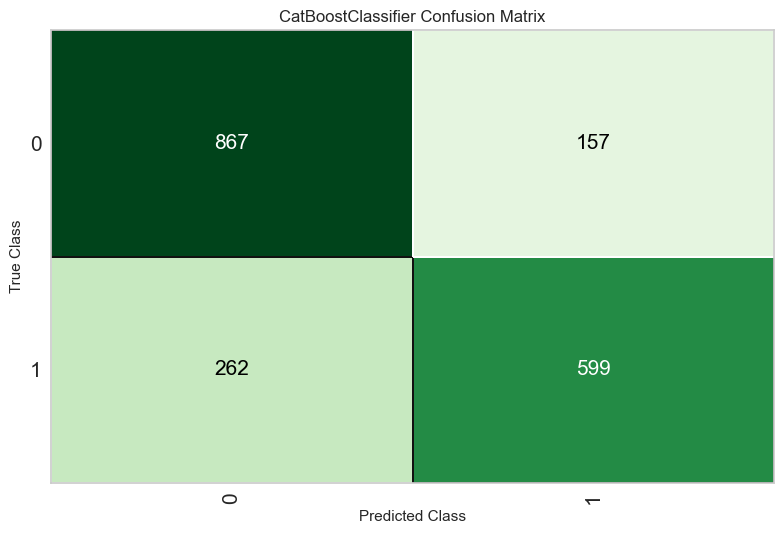

In [16]:
s.plot_model(catboost_mdl, plot='confusion_matrix');

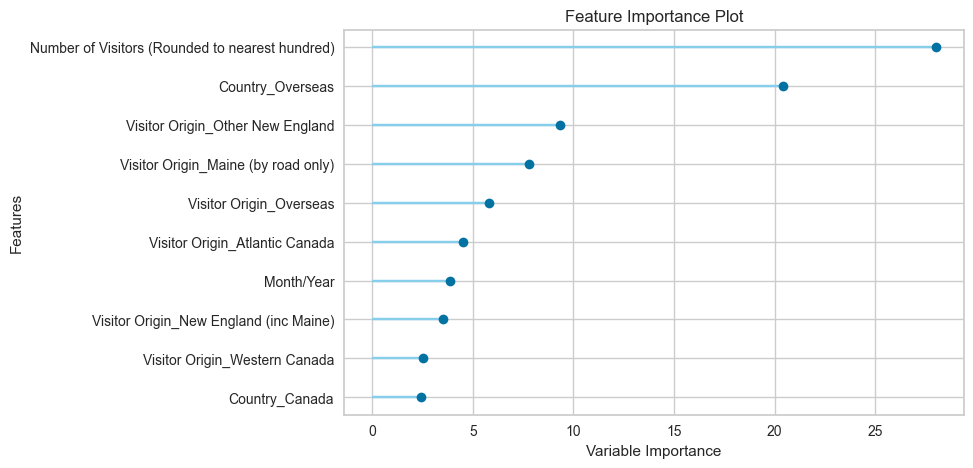

In [18]:
s.plot_model(catboost_mdl, plot='feature');